In [184]:
import pandas as pd

df = pd.read_csv("./dataset/dataset_avaliacoes.csv")

# Retorna as 5 primeiras linhas
df.head()

,ID_avaliacao,avaliacao,nota,sentimento
0,81841,"Esse smartphone superou minhas expectativas, r...",5,positivo
1,28031,o cheiro e muito desagradavel!! pra quem se in...,2,negativo
2,91332,"Eu fiz a compra a loja não entregou o produto,...",1,negativo
3,110045,"Atendeu minhas expectativas, só achei a luz ru...",4,positivo
4,36929,"Gostei muito, só achei que ficou a desejar a q...",5,positivo


In [185]:
# Retorna número de linhas e quantidade de colunas
df.shape

(15501, 4)

In [186]:
df.value_counts("sentimento")

sentimento
positivo    7890
negativo    7611
Name: count, dtype: int64

In [187]:
from sklearn.feature_extraction.text import CountVectorizer # Importa a classe CountVectorizer da biblioteca scikit-learn.
                                                            # CountVectorizer é usada para converter uma coleção de documentos de texto
                                                            # em uma matriz de contagens de termos.

import pandas as pd # Importa a biblioteca Pandas para manipulação de DataFrames.

# Define uma lista de strings (documentos de texto) que serão analisadas.
# Cada string na lista é um "documento".
texto = ['Comprei um produto ótimo', 'Comprei um produto ruim']

# Cria uma instância (objeto) do CountVectorizer.
# Este objeto será responsável por aprender o vocabulário dos textos e transformar os textos em vetores de contagem.
vetorizar = CountVectorizer()

# Aplica o CountVectorizer aos textos:
# 1. 'fit': O vetorizador aprende o vocabulário único de todos os documentos no 'texto'.
#    Por exemplo, ele identificará as palavras 'comprei', 'um', 'produto', 'ótimo', 'ruim'.
# 2. 'transform': Converte cada documento em 'texto' em um vetor de contagens de frequência.
#    Cada elemento do vetor representa a contagem de uma palavra do vocabulário no documento.
bag_of_words = vetorizar.fit_transform(texto)

# 'bag_of_words' é uma matriz esparsa 
# Ela é esparsa porque a maioria dos documentos não contém todas as palavras do vocabulário,
# então haverá muitos zeros.

# Converte a matriz esparsa 'bag_of_words' em um DataFrame esparso do pandas para facilitar a visualização.
# 'sparse.from_spmatrix': Cria um DataFrame a partir de uma matriz esparsa.
# 'columns=vetorizar.get_feature_names_out()': Define os nomes das colunas do DataFrame
#    como as palavras do vocabulário que o vetorizador aprendeu.
matriz_esparsa = pd.DataFrame.sparse.from_spmatrix(bag_of_words, columns=vetorizar.get_feature_names_out())

matriz_esparsa

,comprei,produto,ruim,um,ótimo
0,1,1,0,1,1
1,1,1,1,1,0


In [188]:
vetorizar = CountVectorizer(lowercase=False)
bag_of_words = vetorizar.fit_transform(df.avaliacao)
bag_of_words.shape

(15501, 23352)

In [189]:
# O max_features do exemplo irá buscar as 50 palavras com mais frequência
vetorizar = CountVectorizer(lowercase=False, max_features=50)
bag_of_words = vetorizar.fit_transform(df.avaliacao)
bag_of_words.shape

(15501, 50)

In [190]:
matriz_esparsa_avaliacoes = pd.DataFrame.sparse.from_spmatrix(bag_of_words, columns=vetorizar.get_feature_names_out())

In [191]:
matriz_esparsa_avaliacoes

,Não,Produto,ainda,antes,as,até,bem,bom,chegou,com,...,qualidade,que,recebi,recomendo,se,sem,tem,um,uma,veio
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,...,1,2,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15496,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
15497,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
15498,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
15499,0,1,0,1,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0


In [192]:
from sklearn.model_selection import train_test_split

X_treino, X_teste, y_treino, y_teste = train_test_split(bag_of_words, df.sentimento, random_state=4978)

In [193]:
from sklearn.linear_model import LogisticRegression

regressao_logistica = LogisticRegression()
regressao_logistica.fit(X_treino, y_treino)

acuracia = regressao_logistica.score(X_teste, y_teste)
print(acuracia)

0.7982456140350878


In [194]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

def classificar_texto(df, coluna_avaliacoes, coluna_sentimentos):
    # Transformar o dataframe em uma bag of words
    vetorizar = CountVectorizer(lowercase=False, max_features=50)
    bag_of_words = vetorizar.fit_transform(getattr(df, coluna_avaliacoes))

    # Separar os dados de treino e os dados de teste
    X_treino, X_teste, y_treino, y_teste = train_test_split(bag_of_words, getattr(df, coluna_sentimentos), random_state=4978)
    
    # Executando o treino com o algoritimo de Regressão Logistíca
    regressao_logistica = LogisticRegression()
    regressao_logistica.fit(X_treino, y_treino)

    # Calculando a acuracía
    acuracia = regressao_logistica.score(X_teste, y_teste)
    return acuracia

In [195]:
acuracia = classificar_texto(df, 'avaliacao', 'sentimento')
print(acuracia)

0.7982456140350878


In [ ]:
# Importa a biblioteca WordCloud, usada para gerar nuvens de palavras.
from wordcloud import WordCloud 
# Importa matplotlib.pyplot, comumente usado para criar gráficos e visualizações.
import matplotlib.pyplot as plt 

# Define a função para gerar uma nuvem de palavras.
# Recebe um DataFrame (texto), o nome da coluna de texto, e o sentimento a ser filtrado.
def nuvem_palavras(texto, coluna_texto, sentimento):
    # Filtra o DataFrame 'texto' para selecionar apenas as linhas onde a coluna 'sentimento'
    # corresponde ao 'sentimento' especificado (ex: 'positivo', 'negativo').
    # Em seguida, seleciona apenas os textos da 'coluna_texto' dessas linhas filtradas.
    texto_sentimento = texto.query(f"sentimento == '{sentimento}'")[coluna_texto]

    # Concatena todos os textos filtrados em uma única string, separados por espaços.
    # Esta string unificada é a base para a criação da nuvem de palavras.
    texto_unido = ' '.join(texto_sentimento)
    
    # Cria uma instância da classe WordCloud.
    # - width=800, height=500: Define as dimensões da imagem da nuvem de palavras.
    # - max_font_size=110: Define o tamanho máximo da fonte para as palavras mais frequentes.
    # - collocations=False: Impede que a WordCloud agrupe palavras que aparecem juntas com frequência
    #                      (como "nova york"), tratando-as como palavras separadas.
    # .generate(texto_unido): Gera a nuvem de palavras a partir da string de texto unida.
    nuvem_palavras = WordCloud(width=800, height=500, max_font_size=110, collocations=False).generate(texto_unido)
    
    # Cria uma nova figura para plotagem com o tamanho especificado (largura x altura em polegadas).
    plt.figure(figsize=(10,7))
    
    # Exibe a imagem da nuvem de palavras.
    # - interpolation='bilinear': Suaviza a imagem da nuvem de palavras, tornando-a mais agradável visualmente.
    plt.imshow(nuvem_palavras, interpolation='bilinear')
    
    # Desativa os eixos (números e marcações) do gráfico, pois não são relevantes para uma nuvem de palavras.
    plt.axis('off')
    
    # Exibe a figura plotada com a nuvem de palavras.
    plt.show()
    

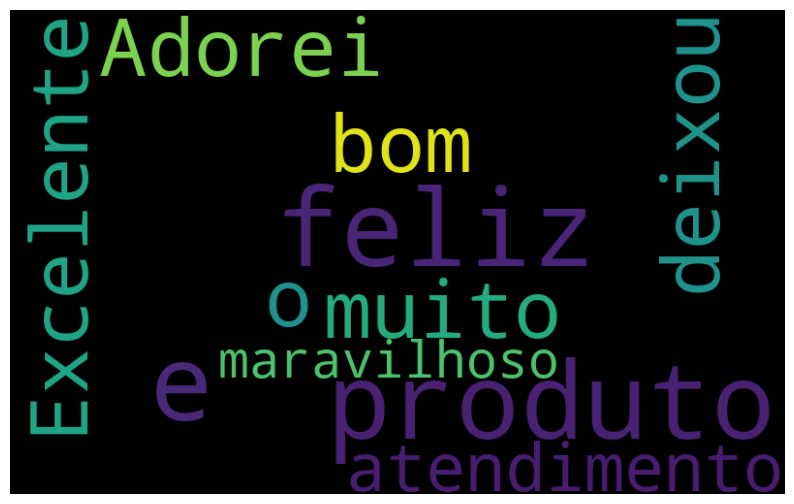

In [212]:
# --- Exemplo de Como Chamar a Função ---

# Exemplo de DataFrame:
df_comentarios = pd.DataFrame({
    'texto_comentario': [
        "Adorei o produto, muito bom e me deixou feliz!",
        "Péssima qualidade, fiquei muito triste com a compra.",
        "É um bom produto, mas esperava mais. Neutro.",
        "Excelente atendimento e produto maravilhoso. Feliz!",
        "Não gostei do resultado. Péssimo e decepcionante."
    ],
    'sentimento': [
        'positivo',
        'negativo',
        'neutro',
        'positivo',
        'negativo'
    ]
})

# --- Chamadas de Exemplo ---

# Para gerar a nuvem de palavras para textos com sentimento 'positivo':
nuvem_palavras(df_comentarios, 'texto_comentario', 'positivo')

# Para gerar a nuvem de palavras para textos com sentimento 'negativo':
# grafico_frequencia(df_comentarios, 'texto_comentario', 'negativo')

# Para gerar a nuvem de palavras para textos com sentimento 'neutro':
# nuvem_palavras(df_comentarios, 'texto_comentario', 'neutro')

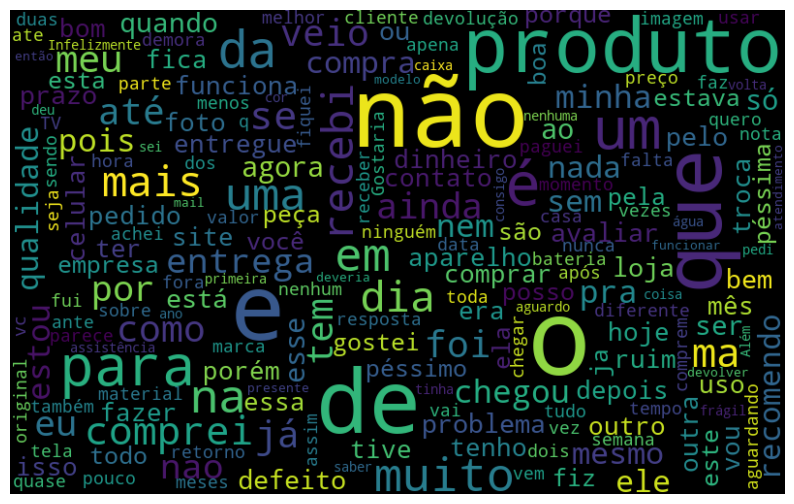

In [199]:
nuvem_palavras(df, 'avaliacao', 'negativo')

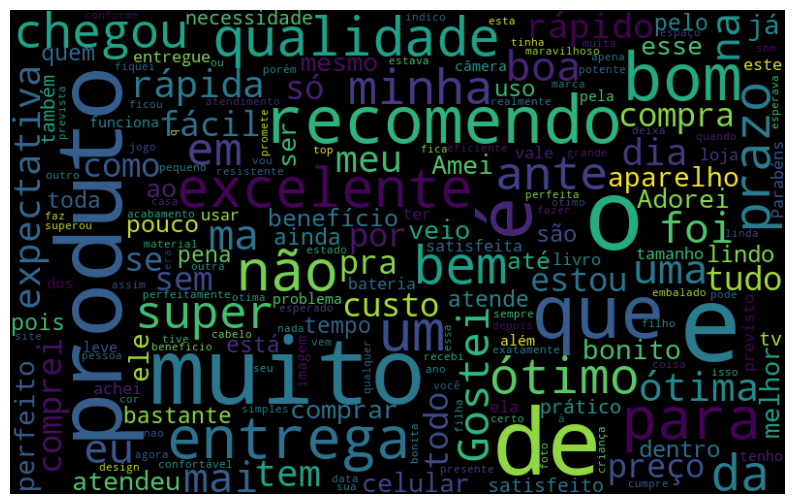

In [200]:
nuvem_palavras(df, 'avaliacao', 'positivo')

In [201]:
import nltk

nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /Users/mac/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /Users/mac/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /Users/mac/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     /Users/mac/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_eng is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /Users/mac/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package ave

True

In [203]:
from nltk import tokenize

frase = 'O produto é excelente e a entrega foi muito rápida!'

token_espaco = tokenize.WhitespaceTokenizer()

token_frase = token_espaco.tokenize(frase)

token_frase


['O',
 'produto',
 'é',
 'excelente',
 'e',
 'a',
 'entrega',
 'foi',
 'muito',
 'rápida!']

In [208]:
from nltk import tokenize # Importa o módulo 'tokenize' do NLTK para dividir texto em palavras.
import seaborn as sns     # Importa a biblioteca Seaborn para visualização de dados (gráficos).
import matplotlib.pyplot as plt # Importa o módulo pyplot do Matplotlib para funcionalidades de plotagem.
import pandas as pd 
import nltk # Importa a biblioteca NLTK (Natural Language Toolkit).

# Define a função para gerar o gráfico de frequência das palavras
def grafico_frequencia(df, coluna_texto, quantidade_palavras):
    
    # Inicializa um tokenizador que divide o texto por espaços em branco
    token_espaco = tokenize.WhitespaceTokenizer()
    
    # Concatena todo o texto da coluna especificada em uma única string,
    # garantindo que cada item seja tratado como string antes da junção.
    todas_palavras = ' '.join([str(texto) for texto in df[coluna_texto]])
    
    # Tokeniza a string gigante de texto em palavras individuais, usando o tokenizador de espaço em branco.
    # Isso cria uma lista de palavras.
    token_frase = token_espaco.tokenize(todas_palavras)

    # Calcula a frequência de cada palavra na lista de tokens usando a função FreqDist do NLTK.
    # FreqDist cria um objeto que se comporta como um dicionário de frequências.
    frequencia = nltk.FreqDist(token_frase)

    # Converte os resultados de frequência para um DataFrame do pandas.
    # A primeira coluna ('Palavra') contém as palavras (chaves do dicionário de frequência).
    # A segunda coluna ('Frequencia') contém as contagens de cada palavra (valores do dicionário de frequência).
    df_frequencia = pd.DataFrame({ 
        'Palavra': list(frequencia.keys()),  
        'Frequencia': list(frequencia.values())
    })

    # Define o tamanho da figura (gráfico) em polegadas (largura x altura).
    plt.figure(figsize=(20,6))

    # Cria um gráfico de barras usando Seaborn.
    # - data: Seleciona as 'quantidade_palavras' mais frequentes do df_frequencia.
    # - x: Define o eixo X como 'Palavra'.
    # - y: Define o eixo Y como 'Frequencia'.
    # - color: Define a cor das barras como cinza.
    ax = sns.barplot(data=df_frequencia.nlargest(columns='Frequencia', n=quantidade_palavras), 
                     x='Palavra', 
                     y='Frequencia', 
                     color='gray')

    # Define o rótulo do eixo Y como 'Contagem'.
    ax.set(ylabel='Contagem')

    # Exibe o gráfico.
    plt.show()


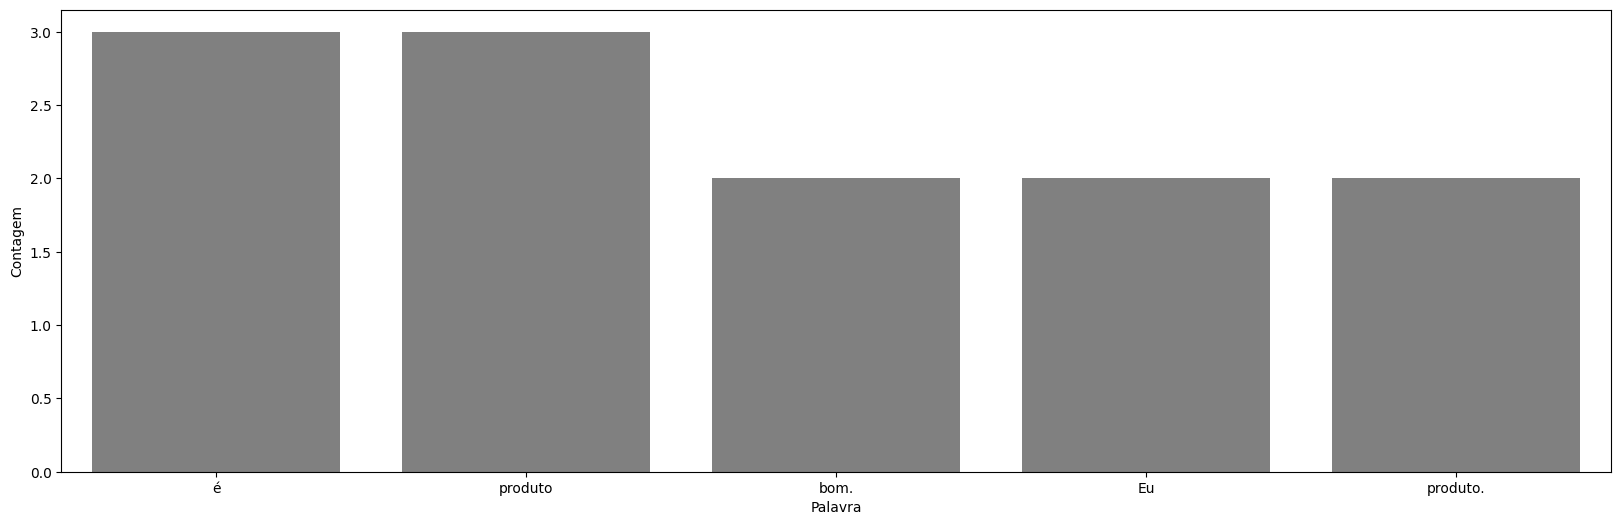

In [209]:
# --- Exemplo de Chamada ---

# 1. Crie um DataFrame de exemplo
dados_exemplo = {
    'id': [1, 2, 3],
    'avaliacao': [
        "Este é um produto muito bom. Eu realmente gostei do produto.",
        "O produto é razoável, mas a qualidade poderia ser melhor. Não é bom.",
        "Eu amo este produto. É o melhor produto que comprei."
    ]
}
df_teste = pd.DataFrame(dados_exemplo)

# 2. Chame a função com seus parâmetros
# Queremos as 5 palavras mais frequentes da coluna 'avaliacao'
grafico_frequencia(df_teste, 'avaliacao', 5) 

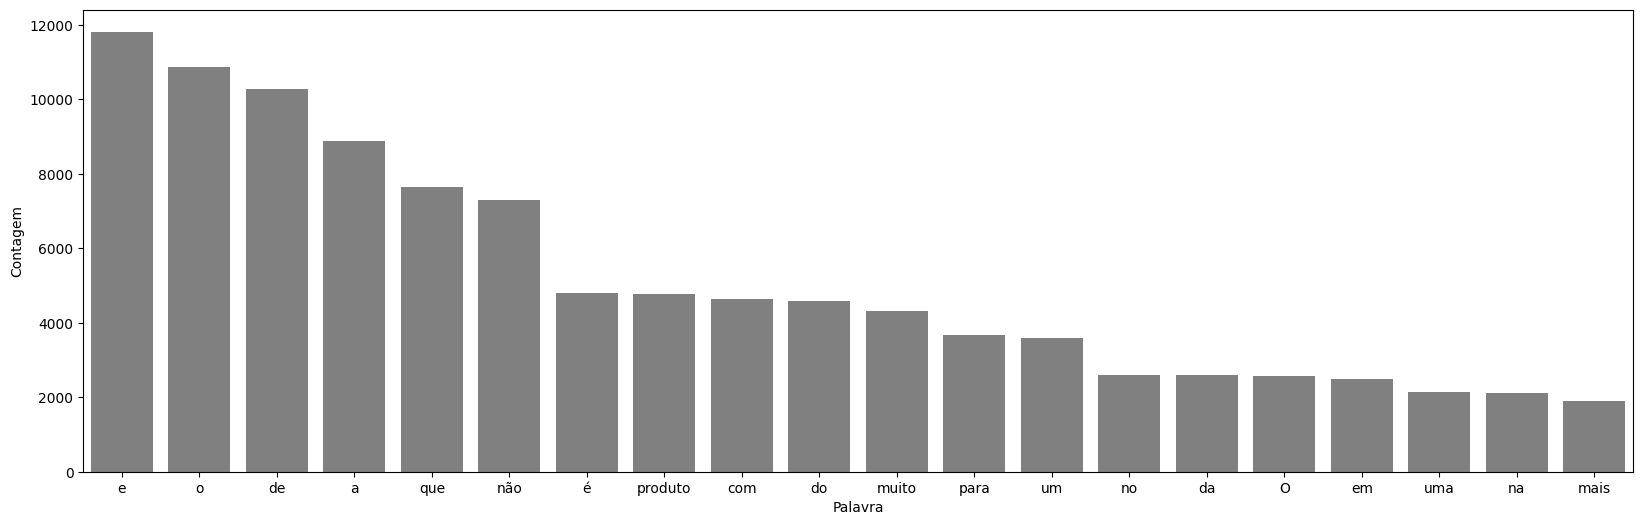

In [210]:
grafico_frequencia(df, 'avaliacao', 20)